## Name:Maiju Varghese
## 40 se aiml


In [1]:
# Step 1: Imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize

In [3]:
# Step 2: Input Data
x = np.array([1, 2, 3]).reshape((-1, 1))
y = np.array([2,3,5])
x.shape

(3, 1)

In [4]:
# Step 3: Create model and fit data
model = LinearRegression()
model.fit(x,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [5]:
#step 4:get coefficient
weight = model.coef_[0]
bias = model.intercept_
print(f"Weight: {weight}, Bias: {bias}")

Weight: 1.4999999999999993, Bias: 0.3333333333333348


In [8]:
#step 5: make predictions
y_pred=model.predict(x)
print("\npredictions for training data:")
for xi,yi,ypi in zip(x.flatten(),y,y_pred):
    print(f"x = {xi}, Actual y = {yi}, Predicted y = {ypi}")


predictions for training data:
x = 1, Actual y = 2, Predicted y = 1.8333333333333341
x = 2, Actual y = 3, Predicted y = 3.3333333333333335
x = 3, Actual y = 5, Predicted y = 4.833333333333333


In [9]:
#step6:error calculations
mse=mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)
print(f"mean squared error is :{mse}")
print(f"R²_Score Error is:{r2}")

mean squared error is :0.05555555555555553
R²_Score Error is:0.9642857142857143


In [10]:
a=np.array([10,20,30,50]).reshape(-1,1)
b=np.array([12,21,29,48])

In [11]:
b_pred=model.predict(a)
print("\npredictions for training data:")
for ai,bi,bpi in zip(a.flatten(),b,b_pred):
    print(f"a = {ai}, Actual b = {bi}, Predicted b = {bpi}")


predictions for training data:
a = 10, Actual b = 12, Predicted b = 15.333333333333329
a = 20, Actual b = 21, Predicted b = 30.33333333333332
a = 30, Actual b = 29, Predicted b = 45.333333333333314
a = 50, Actual b = 48, Predicted b = 75.3333333333333


## MLE

In [12]:
from scipy.optimize import minimize

In [13]:
def neg_log_liklihood(params):
    w,b=params
    sigma2=1
    y_pred=w*x+b
    n11=0.5*np.sum((y-y_pred)**2/sigma2)
    return n11

In [14]:
initial_guess=[0,0]

In [16]:
result=minimize(neg_log_liklihood,initial_guess)
w_mle,b_mle=result.x

In [18]:
print(f"MLE w ={w_mle}")
print(f"MLE b ={b_mle}")

MLE w =-8.3681841778443e-08
MLE b =3.3333335569014952


In [23]:
y_pred =w_mle*x+b_mle
print(f"prediction for training data")
for xi,yi,ypi in zip(x.flatten(),y,y_pred):
    print(f"x={xi},Actual y={yi},Predict y={ypi}")

prediction for training data
x=1,Actual y=2,Predict y=[3.33333347]
x=2,Actual y=3,Predict y=[3.33333339]
x=3,Actual y=5,Predict y=[3.33333331]


## GD

In [32]:
w,b=0,0
alpha=0.0001
n_iter=1000
n=len(x)

for i in range(n_iter):
    y_pred=w*x.flatten()+b
    dw=(-2/n)*np.sum(x.flatten()*(y-y_pred))
    db=(-2/n)*np.sum(y-y_pred)
    w-=alpha*dw
    b-=alpha*db
print("Slope(w):",w)
print("intercept(b):",b)
    

Slope(w): 0.9277932204091286
intercept(b): 0.4003820339618283


In [33]:
y_pred=w*x+b

In [37]:
print(f"prediction for training data")
for xi,yi,ypi in zip(x.flatten(),y,y_pred):
    print(f"x={xi},Actual y={yi},Predict y={ypi}")

prediction for training data
x=1,Actual y=2,Predict y=[1.32817525]
x=2,Actual y=3,Predict y=[2.25596847]
x=3,Actual y=5,Predict y=[3.1837617]


In [38]:
mse=mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)
print(f"mean squared error={mse}")
print(f"r2 score={r2}")

mean squared error=1.4345509930741855
r2 score=0.07778864730945201


In [39]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([1,2,3])
y=np.array([2,3,5])

In [41]:
def loss(w1):
    w0=np.mean(y)-w1*np.mean(x)
    y_pred=w1*x+w0
    return np.sum((y-y_pred)**2)

In [42]:
def gradient(w1):
    w0=np.mean(y)-w1*np.mean(x)
    y_pred=w1*x+w0
    return-2 * np.sum(x*(y-y_pred))

In [43]:
lr=0.1
w1=4
iterations=15

w1_values=[]
loss_values=[]

for i in range(iterations):
    w1_values.append(w1)
    loss_values.append(loss(w1))

    grad=gradient(w1)
    w1=w1-lr*grad

In [46]:
w_space=np.linspace(-2,4,200)
loss_space=[loss(w) for w in w_space]

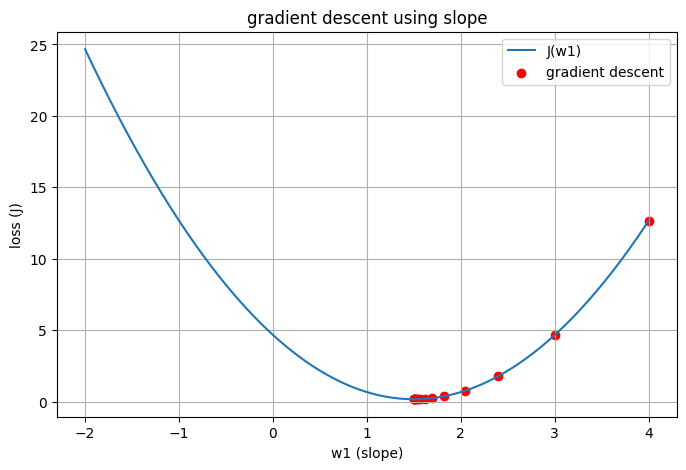

In [47]:
plt.figure(figsize=(8,5))
plt.plot(w_space,loss_space,label="J(w1)")
plt.scatter(w1_values,loss_values,color="red",label="gradient descent")
plt.xlabel("w1 (slope)")
plt.ylabel("loss (J)")
plt.title("gradient descent using slope")
plt.legend()
plt.grid(True)
plt.show()